In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Load the dataset
df = pd.read_csv("D:\Personal projects\EMPLOYEE ATTRITION\EAA\HR-Employee-Attrition.csv")

# Encode categorical variables as binary values
df = pd.get_dummies(df, columns=["BusinessTravel", "Department", "EducationField", "Gender", "JobRole", "MaritalStatus", "OverTime", "Over18"])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop("Attrition", axis=1), df["Attrition"], test_size=0.2, random_state=42)

# Train a gradient boosting classifier
model = GradientBoostingClassifier()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the accuracy of the model
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

# Print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:")
print(cm)


Accuracy: 0.8809523809523809
Confusion matrix:
[[251   4]
 [ 31   8]]


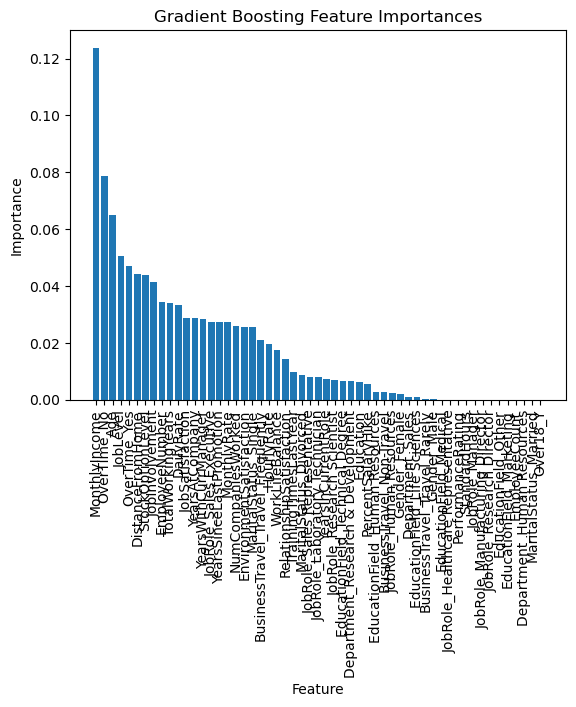

In [2]:
import matplotlib.pyplot as plt

# Extract the feature importances from the model
importances = model.feature_importances_

# Create a list of feature names
feature_names = X_train.columns

# Sort the features by importance
sorted_indices = importances.argsort()[::-1]
sorted_features = [feature_names[i] for i in sorted_indices]

# Create a bar chart of feature importances
plt.bar(range(len(importances)), importances[sorted_indices])
plt.xticks(range(len(importances)), sorted_features, rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Gradient Boosting Feature Importances")
plt.show()
